In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import csv

In [6]:
states = gpd.read_file("data/usa-states-census-2014.shp")
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<Axes: >

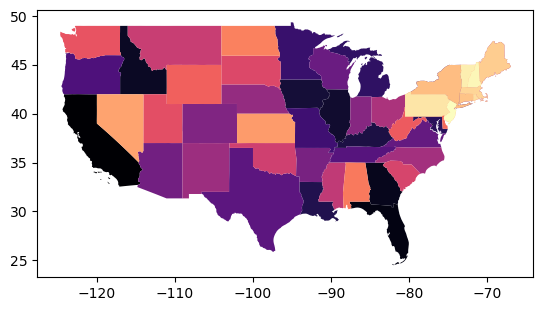

In [16]:
states.plot(cmap = "magma")

<Axes: >

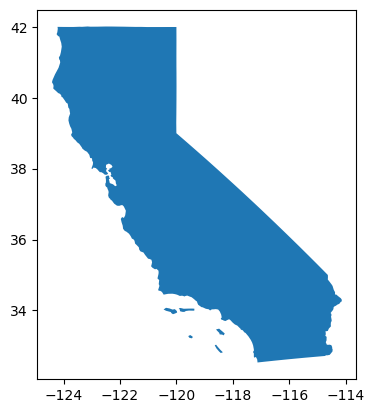

In [15]:
states[states["NAME"] == "California"].plot()

<Axes: >

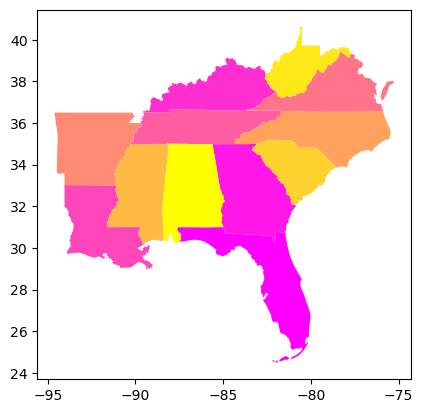

In [10]:
#plot just one state
states[states["region"] == "Southeast"].plot(cmap = "spring")

In [12]:
states.shape

(58, 11)

In [13]:
states.value_counts("NAME")

NAME
Rhode Island            2
Vermont                 2
New Jersey              2
New York                2
Massachusetts           2
Maine                   2
Pennsylvania            2
New Hampshire           2
Connecticut             2
Texas                   1
Wisconsin               1
New Mexico              1
West Virginia           1
North Carolina          1
North Dakota            1
Washington              1
Ohio                    1
Utah                    1
Oklahoma                1
Oregon                  1
Virginia                1
Nevada                  1
South Carolina          1
South Dakota            1
Tennessee               1
Alabama                 1
Montana                 1
Nebraska                1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Idaho                   1
Illinois                1
Indiana

Does not exist.


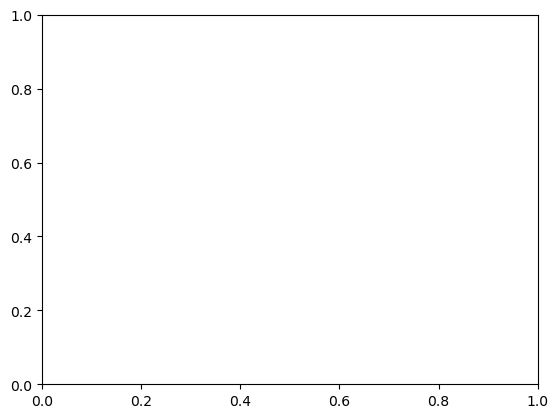

In [19]:
#are alaska and hawaii missing
try:
    states[states["NAME"] == "Alaska"].plot()
    states[states["NAME"] == "Hawai'i"].plot()
except:
    print("Does not exist.")

In [20]:
#drop duplicate states
states = states.drop_duplicates()

In [22]:
states.shape

(49, 11)

In [24]:
#2nd file - presidential data
elec = pd.read_csv("data/1976-2020-president.tab", sep = "\t")
elec.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN \\""BEN\""\""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [28]:
#pick a year and select the data just for that year
year = elec[elec["year"] == 1996]
year.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN
1675,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,662165,1534349,20210113,NaN,DEMOCRAT
1676,1996,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,INDEPENDENT,False,95030,1534349,20210113,NaN,OTHER
1677,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,False,5290,1534349,20210113,NaN,LIBERTARIAN
1678,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"HAGELIN, JOHN",NATURAL LAW,False,1697,1534349,20210113,NaN,OTHER


In [30]:
#how many entries do we have for that year
year.shape

(368, 15)

In [33]:
#keep only the winner (one entry per state)
year_winner = year.sort_values("candidatevotes", ascending = False).drop_duplicates("state")
year_winner.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
1707,1996,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,5119835,10019469,20210113,NaN,DEMOCRAT
1905,1996,NEW YORK,NY,36,21,13,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,3649630,6439129,20210113,NaN,DEMOCRAT
1980,1996,TEXAS,TX,48,74,49,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,2736167,5611644,20210113,NaN,REPUBLICAN
1751,1996,FLORIDA,FL,12,59,43,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,2546870,5303154,20210113,NaN,DEMOCRAT
1773,1996,ILLINOIS,IL,17,33,21,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,2341744,4311391,20210113,NaN,DEMOCRAT


In [35]:
#did we get one entry per state
year_winner.shape

(51, 15)

In [37]:
#verifying if every state has 1 entry
year_winner.value_counts("state")

state
ALABAMA                 1
PENNSYLVANIA            1
NEVADA                  1
NEW HAMPSHIRE           1
NEW JERSEY              1
NEW MEXICO              1
NEW YORK                1
NORTH CAROLINA          1
NORTH DAKOTA            1
OHIO                    1
OKLAHOMA                1
OREGON                  1
RHODE ISLAND            1
MONTANA                 1
SOUTH CAROLINA          1
SOUTH DAKOTA            1
TENNESSEE               1
TEXAS                   1
UTAH                    1
VERMONT                 1
VIRGINIA                1
WASHINGTON              1
WEST VIRGINIA           1
WISCONSIN               1
NEBRASKA                1
MISSOURI                1
ALASKA                  1
IDAHO                   1
ARIZONA                 1
ARKANSAS                1
CALIFORNIA              1
COLORADO                1
CONNECTICUT             1
DELAWARE                1
DISTRICT OF COLUMBIA    1
FLORIDA                 1
GEORGIA                 1
HAWAII                  1
ILLINO

In [42]:
#keep just the columns we want
small_df = year_winner[["state", "party_detailed"]]
small_df.head()

,state,party_detailed
1707,CALIFORNIA,DEMOCRAT
1905,NEW YORK,DEMOCRAT
1980,TEXAS,REPUBLICAN
1751,FLORIDA,DEMOCRAT
1773,ILLINOIS,DEMOCRAT


In [43]:
#drop alaska and hawaii so we dont have conflict with the shapefile
small_df = small_df[small_df["state"] != "ALASKA"]
small_df = small_df[small_df["state"] != "HAWAII"]
small_df.shape

(49, 2)

In [45]:
#convert our state names in shapefile to uppercase
states["upname"] = states["NAME"].str.upper()
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,upname
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",CALIFORNIA
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",DISTRICT OF COLUMBIA
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",FLORIDA
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",GEORGIA
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",IDAHO


In [48]:
#add the red/blue column to the prez df
small_df["color"] = np.where(small_df["party_detailed"] == "REPUBLICAN", "red", "blue")
small_df.head()

,state,party_detailed,color
1707,CALIFORNIA,DEMOCRAT,blue
1905,NEW YORK,DEMOCRAT,blue
1980,TEXAS,REPUBLICAN,red
1751,FLORIDA,DEMOCRAT,blue
1773,ILLINOIS,DEMOCRAT,blue


In [49]:
#merge the 2 dataframes
plotting = states.merge(small_df, left_on = "upname", right_on = "state")
plotting.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,upname,state,party_detailed,color
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",CALIFORNIA,CALIFORNIA,DEMOCRAT,blue
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",DISTRICT OF COLUMBIA,DISTRICT OF COLUMBIA,DEMOCRAT,blue
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",FLORIDA,FLORIDA,DEMOCRAT,blue
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",GEORGIA,GEORGIA,REPUBLICAN,red
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",IDAHO,IDAHO,REPUBLICAN,red


<Axes: >

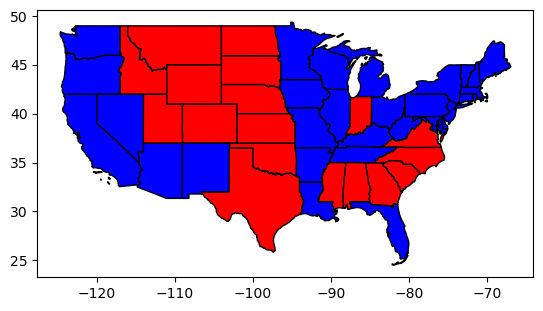

In [51]:
#plot the 1996 election map
plotting.plot(color = plotting["color"], edgecolor = "black")

In [53]:
states.explore()